<a href="https://colab.research.google.com/github/7PAM2015-0509-2023/Spaceship-Titanic/blob/main/Kaggle_Challenge_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anzar Naseer
# Import Libraries and Load Data
# Data Preprocessing
### Handle missing values. Encode categorical features conditionally, then Remove duplicates and scale numerical features.


In [1]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [2]:
# Load the dataset
train_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023/Spaceship-Titanic/main/train.csv'
test_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023/Spaceship-Titanic/main/test.csv'
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Data Preprocessing
def preprocess(df):
    # Handle missing values with checks for column existence
    if 'HomePlanet' in df.columns:
        df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
    if 'CryoSleep' in df.columns:
        df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
    if 'Cabin' in df.columns:
        df['Cabin'].fillna('Unknown/0/Unknown', inplace=True)
        # Split Cabin into deck, num, and side
        df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)
        df.drop(['Cabin'], axis=1, inplace=True)
    if 'Destination' in df.columns:
        df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
    if 'Age' in df.columns:
        df['Age'].fillna(df['Age'].median(), inplace=True)
    if 'VIP' in df.columns:
        df['VIP'].fillna(False, inplace=True)
    if 'RoomService' in df.columns:
        df['RoomService'].fillna(0, inplace=True)
    if 'FoodCourt' in df.columns:
        df['FoodCourt'].fillna(0, inplace=True)
    if 'ShoppingMall' in df.columns:
        df['ShoppingMall'].fillna(0, inplace=True)
    if 'Spa' in df.columns:
        df['Spa'].fillna(0, inplace=True)
    if 'VRDeck' in df.columns:
        df['VRDeck'].fillna(0, inplace=True)

    # Drop the original Name column if it exists
    if 'Name' in df.columns:
        df.drop(['Name'], axis=1, inplace=True)

    # Encode categorical features if they exist
    categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
    for feature in categorical_features:
        if feature in df.columns:
            le = LabelEncoder()
            df[feature] = le.fit_transform(df[feature])

    return df


train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Remove duplicates
train_df.drop_duplicates(inplace=True)

# Scale numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Verify the changes
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_Deck    8693 non-null   int64  
 13  Cabin_Num     8693 non-null   object 
 14  Cabin_Side    8693 non-null   int64  
dtypes: bool(1), float64(6), int64(6), object(2)
memory usage: 959.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data colum

Anusha Vishnumolakala
# Exploratory Data Analysis (EDA)
### Visualize the distribution of numerical and categorical features, and plot a correlation heatmap.


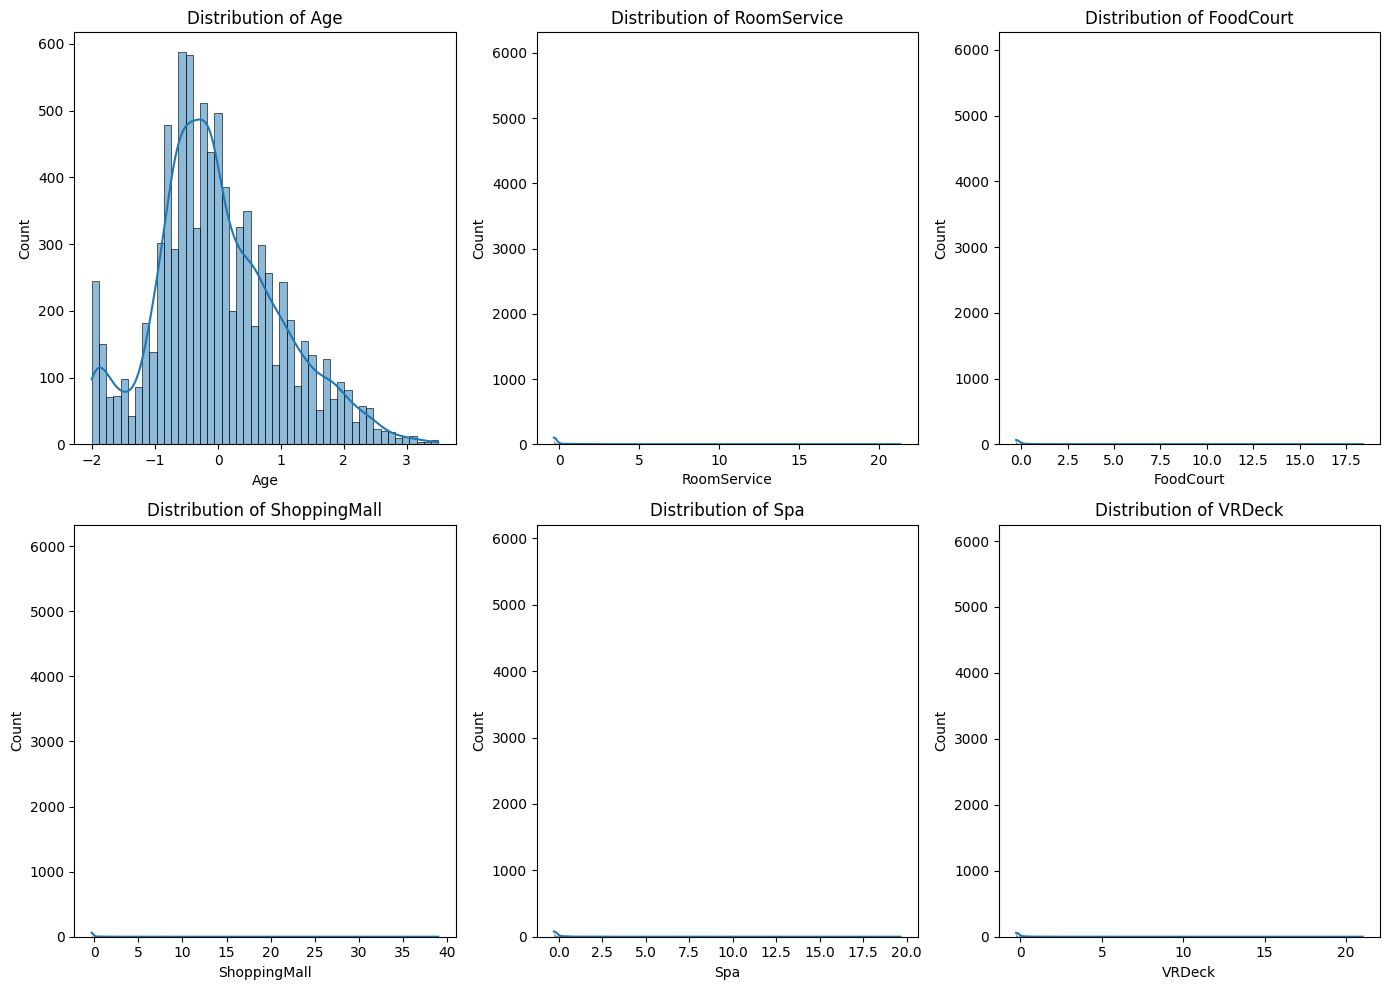

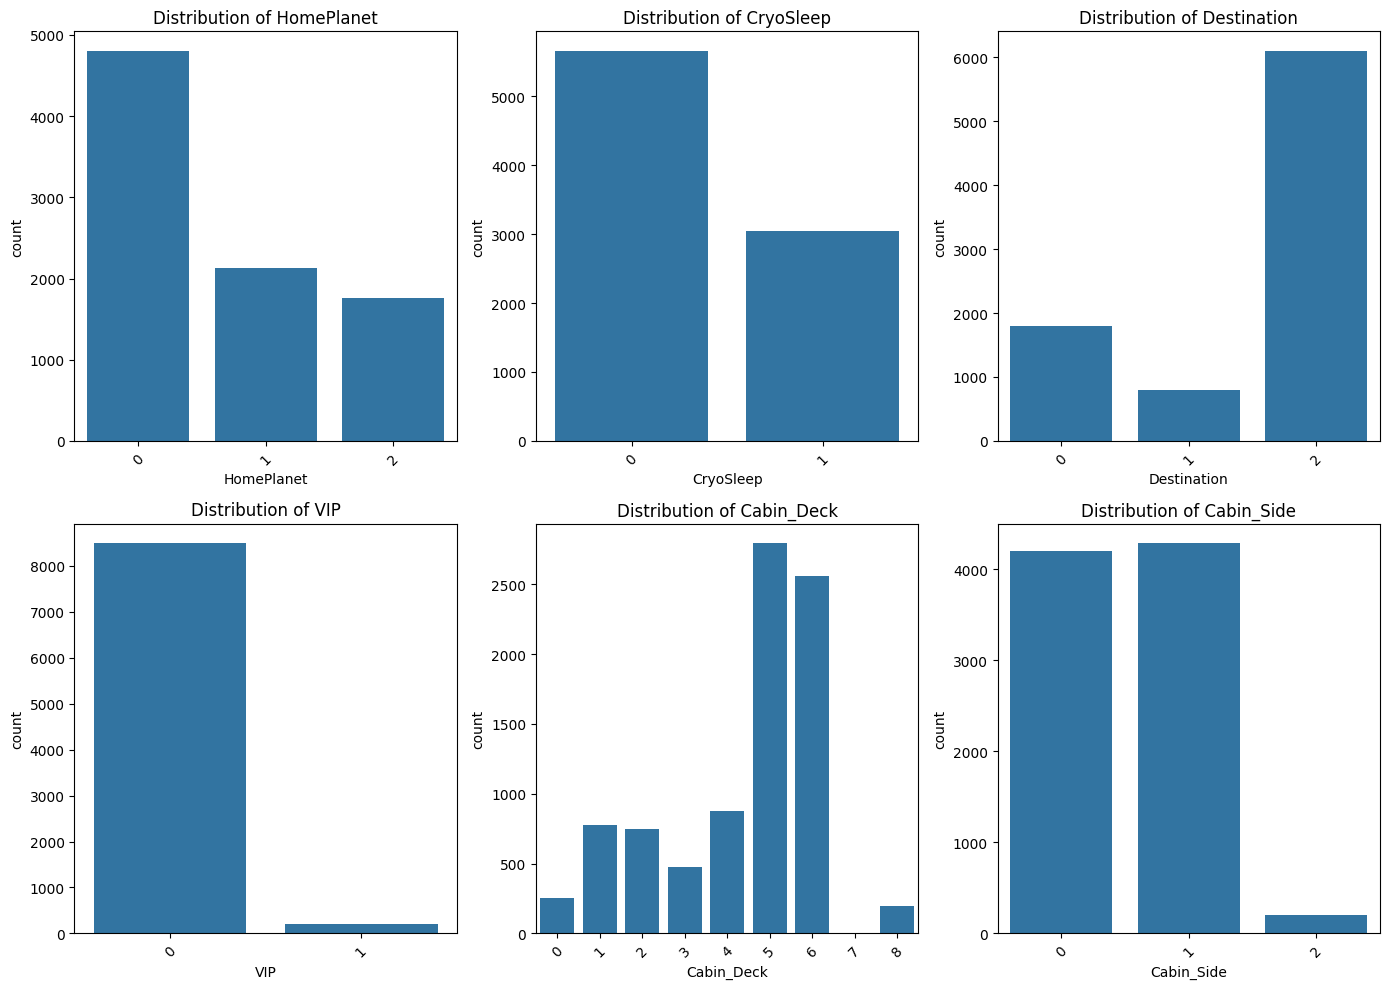

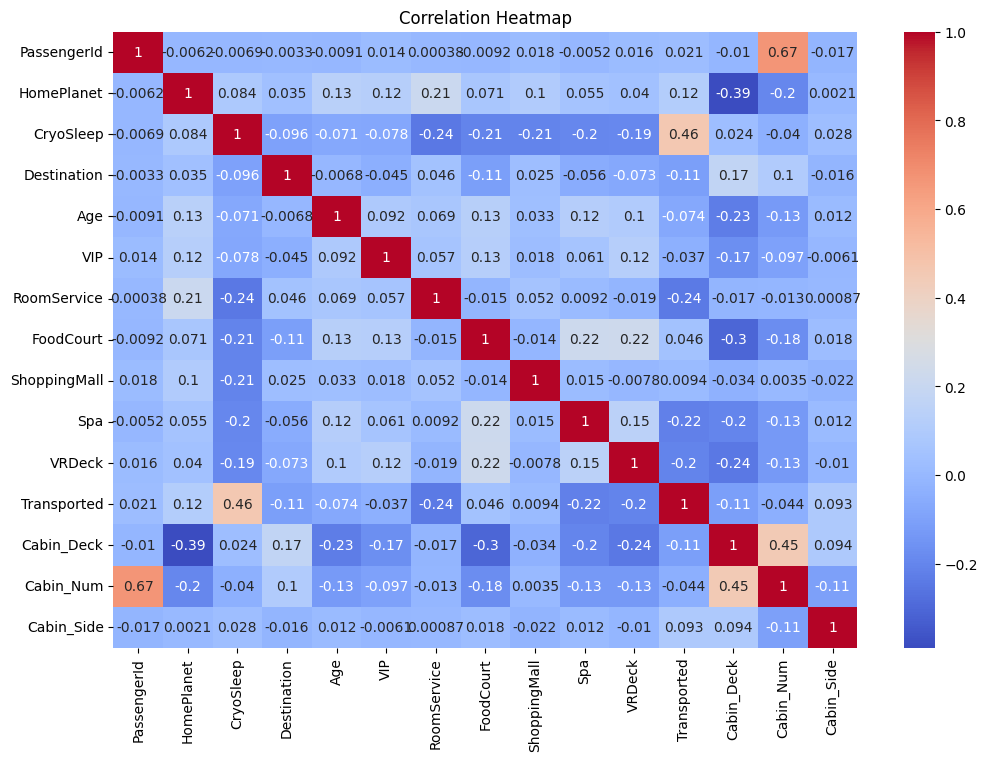

In [4]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Distribution of categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=train_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Muhammad Usama
# Dimensionality Reduction and Visualization
### PCA and t-SNE for dimensionality reduction and visualization.

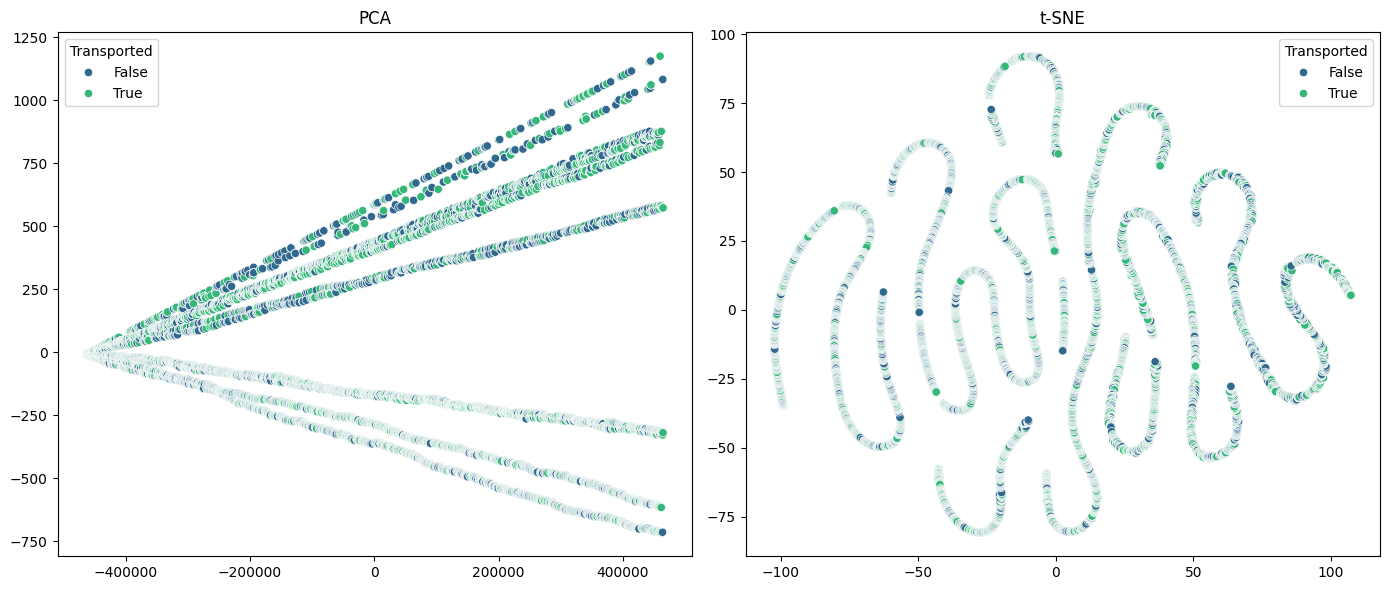

In [5]:
# Dimensionality Reduction and Visualization
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot PCA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA')

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('t-SNE')
plt.tight_layout()
plt.show()

Kalyanachakravarthy Tammina
# Model Building and Evaluation
### Code of train and evaluate three models (Random Forest, Gradient Boosting, and PCA with Gradient Boosting), and comparing their performances.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy of Random Forest: 0.7918
Classification Report of Random Forest:
              precision    recall  f1-score   support

       False       0.78      0.80      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix of Random Forest:
[[692 169]
 [193 685]]
Accuracy of Gradient Boosting: 0.7936
Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

       False       0.81      0.76      0.78       861
        True       0.78      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      17

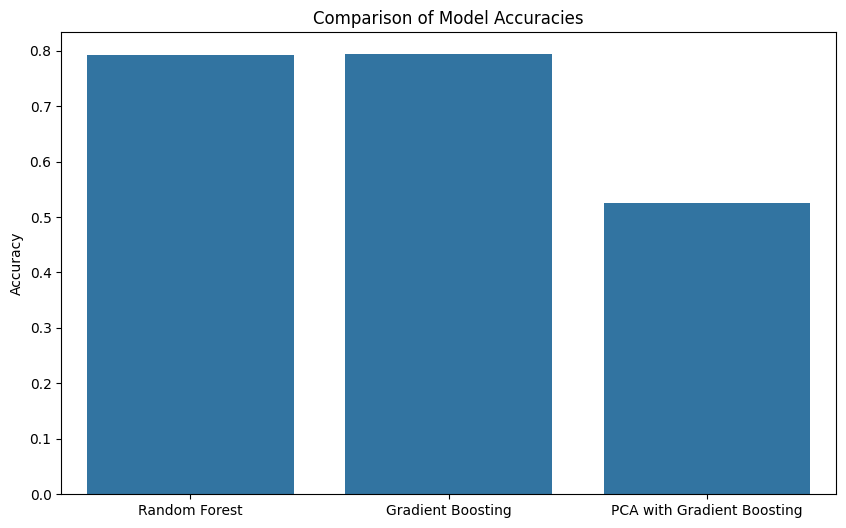

In [6]:
# Model Building and Evaluation
'''Train and evaluate three models (Random Forest, Gradient Boosting, and PCA with Gradient Boosting),
and compare their performances.'''
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_val)

# PCA with Gradient Boosting
pipeline_pca_gb = Pipeline(steps=[
    ('pca', PCA(n_components=0.95)),
    ('gb', GradientBoostingClassifier(random_state=42))
])
param_grid_pca_gb = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4]
}
grid_search_pca_gb = GridSearchCV(estimator=pipeline_pca_gb, param_grid=param_grid_pca_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_pca_gb.fit(X_train, y_train)
best_pca_gb = grid_search_pca_gb.best_estimator_
y_pred_pca_gb = best_pca_gb.predict(X_val)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy of {model_name}: {accuracy:.4f}')
    print(f'Classification Report of {model_name}:')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix of {model_name}:')
    print(confusion_matrix(y_true, y_pred))
    return accuracy

accuracy_rf = evaluate_model(y_val, y_pred_rf, 'Random Forest')
accuracy_gb = evaluate_model(y_val, y_pred_gb, 'Gradient Boosting')
accuracy_pca_gb = evaluate_model(y_val, y_pred_pca_gb, 'PCA with Gradient Boosting')

# Comparison of Model Accuracies
models = ['Random Forest', 'Gradient Boosting', 'PCA with Gradient Boosting']
accuracies = [accuracy_rf, accuracy_gb, accuracy_pca_gb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

Muhammad Talal
# Feature Importances
### Plot feature importances for the Random Forest and Gradient Boosting models.

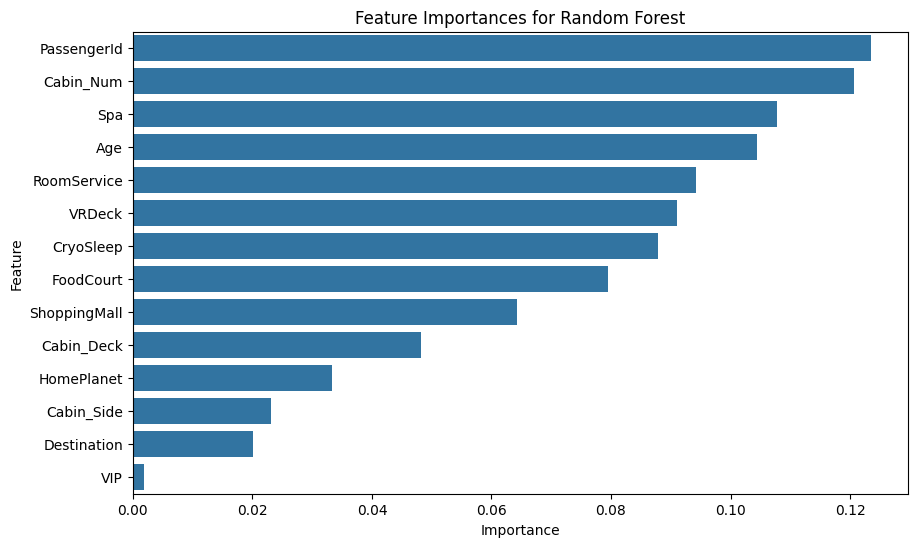

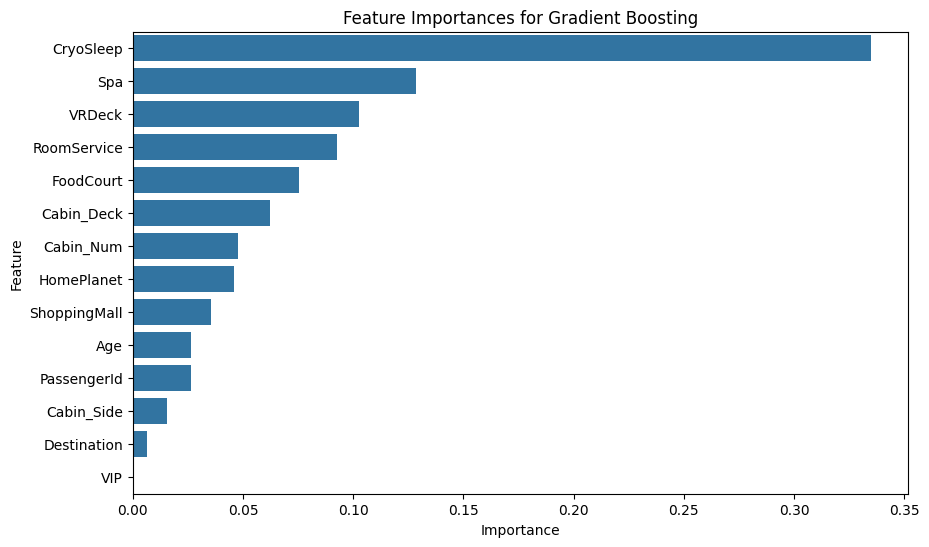

In [7]:
# Feature Importances
'''Plot feature importances for the Random Forest and Gradient Boosting models.'''
def plot_feature_importances(model, model_name):
    importances = model.feature_importances_
    features = X.columns
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title(f'Feature Importances for {model_name}')
    plt.show()

plot_feature_importances(best_rf, 'Random Forest')
plot_feature_importances(best_gb, 'Gradient Boosting')

In [8]:
# Ensure the test dataset has the same columns as the training dataset
test_df_processed = preprocess(test_df)

# Align the features to match the training data
train_features = X.columns
missing_cols = set(train_features) - set(test_df_processed.columns)
for col in missing_cols:
    test_df_processed[col] = 0

test_df_processed = test_df_processed[train_features]

# Apply the same scaling to the numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_df_processed[numerical_features] = scaler.transform(test_df_processed[numerical_features])

# Using the best model from PCA with Gradient Boosting for final predictions
final_predictions = best_pca_gb.predict(test_df_processed)

# Save the final predictions to a CSV file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': final_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")


Submission file created successfully.
